In [1]:
# -*- coding: utf-8 -*-
import os
import shutil
import xml.etree.ElementTree as ET
import pandas as pd
import cv2
import sklearn

In [2]:
# defines two functions, clear_folder and delete_file, to remove files and directories. 
# It then uses these functions to clear specified directories and delete certain files, handling potential errors 

def clear_folder(folder_path):
    """
    Deletes all files and subdirectories in a specified directory.
    
    Args:
        folder_path (str): Path to the directory to be cleared.
    """
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Iterate through all files and directories within the folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                # Check if it's a file or a link and delete it
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                # If it's a directory, delete the directory and all its contents
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                # If an error occurs, print an error message
                print(f'Failed to delete {file_path}. Reason: {e}')

def delete_file(file_path):
    """
    Deletes a file if it exists.
    
    Args:
        file_path (str): Path to the file to be deleted.
    """
    # Check if the file exists
    if os.path.exists(file_path):
        try:
            # Remove the file
            os.remove(file_path)
        except Exception as e:
            # If an error occurs, print an error message
            print(f'Failed to delete {file_path}. Reason: {e}')

# List of folders to be cleared
folders_to_clear = [
    "./Training_Labels",
    "./Final_Training_Images",
    "./Test_Dataset_CSV/Test_Labels",
    "./Final_Test_Dataset/Final_Test_Images"
]

# Iterate through the list of folders and clear each one
for folder in folders_to_clear:
    clear_folder(folder)

# List of files to be deleted
files_to_delete = [
    './Final_Training_Labels_CSV/final_training_labels.csv',
    './Final_Test_Labels_CSV/final_test_labels.csv'
]

# Iterate through the list of files and delete each one
for file_path in files_to_delete:
    delete_file(file_path)


In [3]:
# Specify the paths to the image folders and their corresponding labels
folders_labels = {
    "./small_data/Yan_Style": "yanStyle",
    "./small_data/Liu_Style": "liuStyle",
    "./small_data/Ouyang_Style": "ouyangStyle",
    "./small_data/Clerical_Script": "clericalScript"
}

# Specify the target folder for CSV files and images
target_csv_folder = "./Training_Labels"
target_image_folder = "./Final_Training_Images"

# Create target directories if they don't exist
if not os.path.exists(target_csv_folder):
    os.makedirs(target_csv_folder)
if not os.path.exists(target_image_folder):
    os.makedirs(target_image_folder)

# Iterate over the folder-label pairs
for folder_path, label in folders_labels.items():
    # List all images in the folder that end with '.png'
    images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Prepare data for CSV and copy images with new names
    new_image_names = []
    for img in images:
        new_name = label + "_" + img  # Use label as the prefix instead of folder name
        new_image_names.append(new_name)
        
        # Copy and rename image to target folder
        source_path = os.path.join(folder_path, img)
        target_path = os.path.join(target_image_folder, new_name)
        shutil.copy(source_path, target_path)
    
    # Create a DataFrame with updated image names and their corresponding label
    df = pd.DataFrame({
        'image': new_image_names,
        'label': [label] * len(new_image_names)
    })
    
    # Define the name of the CSV file based on the label
    csv_file_name = f"{label}_labeled.csv"
    
    # Save the DataFrame to a CSV file without the index in the CSV target folder
    df.to_csv(os.path.join(target_csv_folder, csv_file_name), index=False)

    # Optionally, print out a confirmation
    print(f"CSV file created for {label}: {os.path.join(target_csv_folder, csv_file_name)}")
    print(f"Images from {label} have been copied and renamed to {target_image_folder}.")


CSV file created for yanStyle: ./Training_Labels\yanStyle_labeled.csv
Images from yanStyle have been copied and renamed to ./Final_Training_Images.
CSV file created for liuStyle: ./Training_Labels\liuStyle_labeled.csv
Images from liuStyle have been copied and renamed to ./Final_Training_Images.
CSV file created for ouyangStyle: ./Training_Labels\ouyangStyle_labeled.csv
Images from ouyangStyle have been copied and renamed to ./Final_Training_Images.
CSV file created for clericalScript: ./Training_Labels\clericalScript_labeled.csv
Images from clericalScript have been copied and renamed to ./Final_Training_Images.


In [4]:
def merge_csv(csv_paths, target_path):
    """
    Merge multiple CSV files into a single CSV file.

    This function reads several CSV files from given paths, merges them into a single DataFrame,
    and writes the combined DataFrame to a new CSV file specified by the target path.

    Parameters:
    csv_paths (list of str): A list of file paths pointing to the CSV files to be merged.
    target_path (str): The file path where the merged CSV file will be saved.

    Returns:
    None
    """
    # Read all CSV files specified in the csv_paths list using a list comprehension
    dataframes = [pd.read_csv(csv_path) for csv_path in csv_paths]

    # Merge all dataframes into one using concat method, resetting the index to avoid index duplication
    merged_df = pd.concat(dataframes, ignore_index=True)

    # Write the merged dataframe to a new CSV file, without including the row indices in the output file
    merged_df.to_csv(target_path, index=False)

# List of paths to source CSV files
csv_paths = [
    "./Training_Labels/liuStyle_labeled.csv",
    "./Training_Labels/ouyangStyle_labeled.csv",
    "./Training_Labels/clericalScript_labeled.csv",
    "./Training_Labels/yanStyle_labeled.csv"
]


# Path to the target CSV file
target_path = './Final_Training_Labels_CSV/final_training_labels.csv'

# Check if the target folder exists, and create it if it does not
import os
if not os.path.exists('./Final_Training_Labels_CSV'):
    os.makedirs('./Final_Training_Labels_CSV')

# Call the merge_csv function to merge the CSV files
merge_csv(csv_paths, target_path)

# Print a confirmation message indicating the file has been successfully merged and saved
print(f"The CSV files have been successfully merged into {target_path}.")



The CSV files have been successfully merged into ./Final_Training_Labels_CSV/final_training_labels.csv.


In [5]:
# Specify the paths to the image folders and their corresponding labels
folders_labels = {
    "test_dataset/Yan_Style": "yanStyle",
    "test_dataset/Liu_Style": "liuStyle",
    "test_dataset/Ouyang_Style": "ouyangStyle",
    "test_dataset/Clerical_Script": "clericalScript"
}

# Specify the target folder for CSV files and images
target_csv_folder = "./Test_Dataset_CSV/Test_Labels"
target_image_folder = "./Final_Test_Dataset/Final_Test_Images"

# Create target directories if they don't exist
if not os.path.exists(target_csv_folder):
    os.makedirs(target_csv_folder)
if not os.path.exists(target_image_folder):
    os.makedirs(target_image_folder)

# Iterate over the folder-label pairs
for folder_path, label in folders_labels.items():
    # List all images in the folder that end with '.png'
    images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Prepare data for CSV and copy images with new names
    new_image_names = []
    for img in images:
        new_name = label + "_" + img  # Use label as the prefix instead of folder name
        new_image_names.append(new_name)
        
        # Copy and rename image to target folder
        source_path = os.path.join(folder_path, img)
        target_path = os.path.join(target_image_folder, new_name)
        shutil.copy(source_path, target_path)
    
    # Create a DataFrame with updated image names and their corresponding label
    df = pd.DataFrame({
        'image': new_image_names,
        'label': [label] * len(new_image_names)
    })
    
    # Define the name of the CSV file based on the label
    csv_file_name = f"{label}_labeled.csv"
    
    # Save the DataFrame to a CSV file without the index in the CSV target folder
    df.to_csv(os.path.join(target_csv_folder, csv_file_name), index=False)

    # Optionally, print out a confirmation
    print(f"CSV file created for {label}: {os.path.join(target_csv_folder, csv_file_name)}")
    print(f"Images from {label} have been copied and renamed to {target_image_folder}.")

CSV file created for yanStyle: ./Test_Dataset_CSV/Test_Labels\yanStyle_labeled.csv
Images from yanStyle have been copied and renamed to ./Final_Test_Dataset/Final_Test_Images.
CSV file created for liuStyle: ./Test_Dataset_CSV/Test_Labels\liuStyle_labeled.csv
Images from liuStyle have been copied and renamed to ./Final_Test_Dataset/Final_Test_Images.
CSV file created for ouyangStyle: ./Test_Dataset_CSV/Test_Labels\ouyangStyle_labeled.csv
Images from ouyangStyle have been copied and renamed to ./Final_Test_Dataset/Final_Test_Images.
CSV file created for clericalScript: ./Test_Dataset_CSV/Test_Labels\clericalScript_labeled.csv
Images from clericalScript have been copied and renamed to ./Final_Test_Dataset/Final_Test_Images.


In [6]:
# List of paths to source CSV files
csv_paths = [
    "Test_Dataset_CSV/Test_Labels/liuStyle_labeled.csv",
    "Test_Dataset_CSV/Test_Labels/ouyangStyle_labeled.csv",
    "Test_Dataset_CSV/Test_Labels/clericalScript_labeled.csv",
    "Test_Dataset_CSV/Test_Labels/yanStyle_labeled.csv"
]

# Path to the target CSV file
target_path = './Final_Test_Labels_CSV/final_test_labels.csv'

# Check if the target folder exists, and create it if it does not
if not os.path.exists('./Final_Test_Labels_CSV'):
    os.makedirs('./Final_Test_Labels_CSV')

# Call the function to merge the CSV files
merge_csv(csv_paths, target_path)

# Print a confirmation message indicating that the file has been successfully merged and saved
print(f"The CSV files have been successfully merged into {target_path}.")


The CSV files have been successfully merged into ./Final_Test_Labels_CSV/final_test_labels.csv.


In [37]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU is available")
else:
    print("GPU is not available")

# or a more detailed list of available GPU devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



GPU is available
Num GPUs Available:  1


In [8]:
import pandas as pd
image_dir = "./Final_Training_Images"
annotation_dir = "./Final_Training_Labels_CSV/final_training_labels.csv"


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import pandas as pd
def load_data(image_dir, annotation_dir):
    """
    Load images and their corresponding labels from specified directories.

    This function reads a CSV file containing image file names and labels, shuffles the data,
    and then loads each image from the directory while applying grayscale conversion. Images
    that fail to load or don't exist are skipped with a printed error message.

    Parameters:
    image_dir (str): Directory path where images are stored.
    annotation_dir (str): File path to the CSV file containing image filenames and labels.

    Returns:
    tuple: A tuple containing two lists - one for the images and one for the labels.
    """
    images = []  # List to store loaded images
    labels = []  # List to store image labels

    # Load and shuffle the annotations data
    data = pd.read_csv(annotation_dir)
    data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the rows of the DataFrame
    
    # Loop through each row in the dataframe
    for index, row in data.iterrows():
        image_file = row['image']
        image_path = os.path.join(image_dir, image_file)  # Construct full image path

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"File does not exist: {image_path}")
            continue
        
        # Load the image in grayscale mode
        img = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
        
        # If the image fails to load, continue to the next one
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue
            
        label = row['label']  # Extract the label from the row
        images.append(img)  # Add the image to the list
        labels.append(label)  # Add the label to the list

    return images, labels
images, labels = load_data(image_dir, annotation_dir)

In [10]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Number of images: 3190
Number of labels: 3190


In [11]:
def preprocess_data(images, labels):
    """
    Resize, normalize, and preprocess the list of images and their corresponding labels.
    """
    processed_images = []  # List to store processed images
    processed_labels = []  # List to store labels corresponding to processed images

    # Loop through each image and its corresponding label
    for image, label in zip(images, labels):
        # Resize image to 96x96 pixels
        image = cv2.resize(image, (96, 96))

        # # Normalize pixel values to be between 0 and 1
        # image = image / 255.0

        # Add a new axis to image to make it compatible with model input requirements
        image = image[..., np.newaxis]

        # Append the processed image and label to their respective lists
        processed_images.append(image)
        processed_labels.append(label)

    return processed_images, processed_labels

processed_images, processed_labels = preprocess_data(images, labels)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert the list of processed images to a 4D numpy array.
# The 4D dimensions are necessary for CNN input which expects [batch, height, width, channels].
images_3D = np.array(processed_images)  

# Initialize the LabelEncoder, which will convert text labels into a numeric format.
# Neural networks do not understand text data, so it's crucial to encode categorical labels
# into numbers.
le = LabelEncoder()

# Fit the LabelEncoder to the processed labels and transform them into numeric format.
# This step learns the mapping of each label to a unique integer and then transforms the labels
# to these integers.
encoded_labels = le.fit_transform(processed_labels)  

# Print the first 30 encoded labels to verify the encoding has worked correctly.
print("First 30 encoded labels:", encoded_labels[:30])

# Split the image data and the encoded labels into training and testing sets.
# This is done to evaluate the model on data it has not seen during training, ensuring
# that we can measure its generalization ability.
# 'test_size=0.2' indicates that 20% of the data will be reserved for the test set,
# 'random_state=42' ensures reproducibility of the results by providing a fixed seed for random operations.
images_train, images_test, labels_train, labels_test = train_test_split(
    images_3D, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)



First 30 encoded labels: [2 2 3 3 0 2 3 0 0 1 0 3 3 2 3 0 3 2 2 0 2 3 2 1 3 2 1 2 3 2]


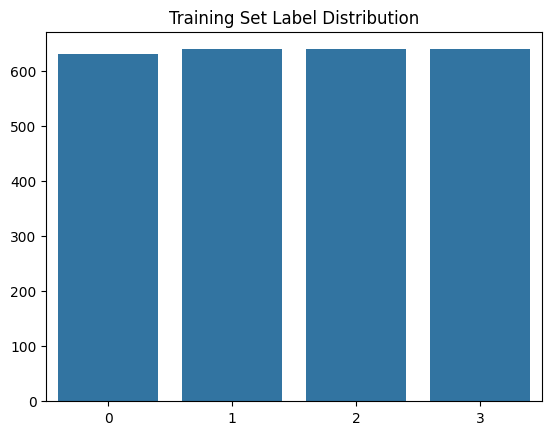

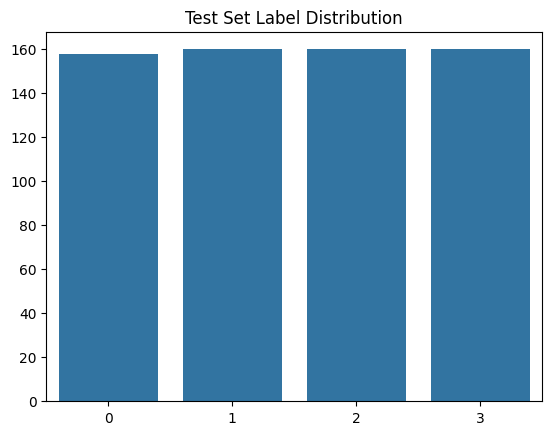

Training set size: 2552
Test set size: 638
Training set label distribution: [632 640 640 640]
Test set label distribution: [158 160 160 160]


In [13]:
import numpy as np  # Import numpy for numerical operations and handling arrays
import seaborn as sns  # Import seaborn for data visualization
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for creating static plots

# Define a function to plot the distribution of labels
def plot_label_distribution(labels, title):
    """
    Plot the distribution of labels using a bar chart.

    Parameters:
    labels (array-like): Array or list of labels to plot.
    title (str): Title of the plot to be displayed.

    The function calculates the unique labels and their counts, then uses seaborn to create a bar plot.
    """
    # Calculate unique labels and their counts
    unique, counts = np.unique(labels, return_counts=True)
    
    # Create a bar plot showing the distribution of unique labels
    sns.barplot(x=unique, y=counts)  # Plot x as unique labels and y as their counts
    plt.title(title)  # Set the title of the plot
    plt.show()  # Display the plot

# call the function to plot the distribution of labels in training and test sets
plot_label_distribution(labels_train, 'Training Set Label Distribution')
plot_label_distribution(labels_test, 'Test Set Label Distribution')

# Print the size and label distribution of the training and test sets to confirm dataset consistency
print("Training set size:", len(labels_train))  # Print the number of elements in the training set
print("Test set size:", len(labels_test))  # Print the number of elements in the test set

# Print the distribution of labels in the training and test sets
print("Training set label distribution:", np.bincount(labels_train))  # np.bincount counts the number of occurrences of each value in an array of non-negative ints
print("Test set label distribution:", np.bincount(labels_test))  # Same as above for the test set



In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize an ImageDataGenerator with specific image transformations.
# This set of transformations has been chosen based on further tests that
# showed improvements in model performance, especially better generalization
# from the increased data variety and complexity.
datagen = ImageDataGenerator(
    rotation_range=10,          # Allows up to 10 degrees of random rotation. Minor rotations
                                # can simulate variations in camera angle and human perception,
                                # improving robustness.

    width_shift_range=0.1,      # Randomly shifts images horizontally by up to 10% of the image width.
                                # This helps the model handle different object placements.
                                
    height_shift_range=0.1,     # Randomly shifts images vertically by up to 10% of the image height.
                                # Similar to width_shift, it helps in learning different object placements.
                                
    brightness_range=[0.8, 1.2],# Randomly changes image brightness by a factor of 0.8 to 1.2.
                                # It aids in coping with different lighting conditions.
                                
    shear_range=0.1,            # Shear transformations by up to 10% in counter-clockwise direction.
                                # Shearing can mimic natural variations in perspective.
                                
    zoom_range=0.1,             # Random zooming by up to 10%. Zoom can simulate user interaction
                                # differences and perspective changes.
                                
    channel_shift_range=20.0,   # Randomly shifts color channels by up to 20 units.
                                # Helps in dealing with color variations in different lighting.
                                
    horizontal_flip=True,       # Allows horizontal flipping. Useful for symmetric objects and
                                # can double the dataset size effectively.
                                
    fill_mode='nearest',        # Fills new pixels created by transformations using the nearest
                                # existing pixel's value. Chosen for its simplicity and performance.
    rescale=1./255                # Rescale the image values to [0, 1]

)

# Create a training data generator that fetches batches of images and their labels
# from the specified arrays. This generator applies the above transformations randomly,
# creating a potentially infinite stream of augmented image data.
train_datagen = datagen.flow(
    images_train,              # Array of input images.
    labels_train,              # Array of corresponding labels.
    batch_size=32              # Number of images to yield per batch. Determines how many images
                               # the model sees at once and affects memory usage and performance.
)



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize an ImageDataGenerator for validation data.
# Rescaling is applied here
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator for the validation dataset using the ImageDataGenerator instance.
# This generator will provide batches of image data and labels from the test set (now used as validation data).
# 'images_test' and 'labels_test' should be arrays containing the image data and their corresponding labels.
# 'batch_size=32' specifies that the generator should return 32 images and their labels at a time.
# This batch size is a typical setting that balances computational efficiency and model training performance.
validation_generator = valid_datagen.flow(
    images_test,  # Array of images to be used for validation
    labels_test,  # Corresponding labels for the validation images
    batch_size=32  # Number of images to return in each batch
)


In [16]:
# # To test a specific model, uncomment the desired model's definition and comment out the others. 
# # Only one model should be active at a time to avoid conflicts.

# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dropout

# def create_model():
#     """
#     Build a convolutional neural network using TensorFlow and Keras.

#     The model uses repeated blocks of convolutional layers followed by batch normalization,
#     LeakyReLU activations, and dropout for regularization. It incorporates skip connections
#     similar to a ResNet architecture to facilitate deeper networks.

#     Returns:
#     tf.keras.Model: A compiled Keras model ready for training.
#     """
#     # Define the input tensor with the expected shape of the images
#     inputs = tf.keras.Input(shape=(96, 96, 1))
#     x = inputs
    
#     # First convolutional block with normalization, activation, and dropout
#     x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)  # Dropout to reduce overfitting

#     # Three more convolutional blocks with the same configuration
#     for _ in range(3):
#         x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = Dropout(0.3)(x)

#     # Twelve additional convolutional blocks
#     for _ in range(12):
#         x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = Dropout(0.3)(x)

#     # First skip connection
#     skip1 = x
#     for _ in range(5):
#         x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = Dropout(0.3)(x)
#     x = tf.keras.layers.Add()([x, skip1])  # Adding the output of the block to the earlier block

#     # Second skip connection
#     skip2 = x
#     for _ in range(5):
#         x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = Dropout(0.3)(x)
#     x = tf.keras.layers.Add()([x, skip2])  # Another skip connection

#     # Global average pooling and output layer
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     outputs = tf.keras.layers.Dense(4, activation='softmax')(x)  # Softmax for multi-class classification

#     # Creating the model object with inputs and outputs
#     model = tf.keras.Model(inputs=inputs, outputs=outputs)
#     return model

# # Initialize the model using the custom model creation function
# model = create_model()

# # Choose an optimizer and compile the model with loss and metrics
# optimizer = Adam(learning_rate=0.001)  # Adam optimizer with a learning rate of 0.001
# # Alternatively, RMSprop can be used:
# # optimizer = RMSprop(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
## To test a specific model, uncomment the desired model's definition and comment out the others. 
## Only one model should be active at a time to avoid conflicts.

# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dropout, Conv2D, Add, GlobalAveragePooling2D, Dense, Input

# def create_resnet_block(x, num_filters):
#     """
#     Creates a ResNet block with two convolutional layers and a skip connection.
    
#     Args:
#     x (tensor): input tensor to the block.
#     num_filters (int): number of filters for the convolutional layers.
    
#     Returns:
#     tensor: output tensor from the block.
#     """
#     # Save the input value for the skip connection
#     shortcut = x
    
#     # First convolution
#     x = Conv2D(num_filters, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
    
#     # Second convolution
#     x = Conv2D(num_filters, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
    
#     # Skip connection and output activation
#     x = Add()([x, shortcut])
#     x = LeakyReLU()(x)
    
#     return x

# def create_model():
#     """
#     Build a convolutional neural network using TensorFlow and Keras that incorporates ResNet-like skip connections.
    
#     Returns:
#     tf.keras.Model: A compiled Keras model ready for training.
#     """
#     # Input layer
#     inputs = Input(shape=(96, 96, 1))
    
#     # Initial convolutional block
#     x = Conv2D(64, (3, 3), padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     # Repeated ResNet blocks
#     num_blocks = 25  # we can adjust the number of blocks
#     for _ in range(num_blocks):
#         x = create_resnet_block(x, 64)
    
#     # Global average pooling and output layer
#     x = GlobalAveragePooling2D()(x)
#     outputs = Dense(4, activation='softmax')(x)
    
#     # Create model
#     model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
#     return model

# # Initialize the model
# model = create_model()

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# To test a specific model, uncomment the desired model's definition and comment out the others. 
# Only one model should be active at a time to avoid conflicts.

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """A block that has a conv layer at shortcut."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides, padding='valid', name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), padding='valid', name=conv_name_base + '2c')(x)
    x = BatchNormalization(name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides, padding='valid', name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(name=bn_name_base + '1')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), padding='valid', name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), padding='valid', name=conv_name_base + '2c')(x)
    x = BatchNormalization(name=bn_name_base + '2c')(x)

    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def ResNet50(input_shape=(96, 96, 1), classes=4):
    img_input = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='conv1')(img_input)
    x = BatchNormalization(name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 2
    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    for i in ['b', 'c', 'd']:
        x = identity_block(x, 3, [128, 128, 512], stage=3, block=i)

    # Stage 4
    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    for i in ['b', 'c', 'd', 'e', 'f']:
        x = identity_block(x, 3, [256, 256, 1024], stage=4, block=i)

    # Stage 5
    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dense(classes, activation='softmax', name='fc' + str(classes))(x)

    model = Model(inputs=img_input, outputs=x, name='resnet50')
    return model

model = ResNet50(input_shape=(96, 96, 1), classes=4)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def simple_summary(model):
    # Print the headers for the summary
    print(f"{'Layer Name':<25} {'Output Shape':<30} {'Param #':<15}")
    print("="*70)
    
    # Loop through each layer in the model
    for layer in model.layers:
        layer_name = layer.name
        output_shape = layer.output_shape
        param_count = layer.count_params()
        
        # Print each layer's information in a simplified format
        print(f"{layer_name:<25} {str(output_shape):<30} {param_count:<15}")
    
    # Print the total number of parameters in the model
    total_params = model.count_params()
    print("="*70)
    print(f"Total Parameters: {total_params}")

# Call the custom summary function
simple_summary(model)

Layer Name                Output Shape                   Param #        
input_2                   [(None, 96, 96, 1)]            0              
conv1                     (None, 48, 48, 64)             3200           
bn_conv1                  (None, 48, 48, 64)             256            
activation_49             (None, 48, 48, 64)             0              
max_pooling2d_1           (None, 24, 24, 64)             0              
res2a_branch2a            (None, 24, 24, 64)             4160           
bn2a_branch2a             (None, 24, 24, 64)             256            
activation_50             (None, 24, 24, 64)             0              
res2a_branch2b            (None, 24, 24, 64)             36928          
bn2a_branch2b             (None, 24, 24, 64)             256            
activation_51             (None, 24, 24, 64)             0              
res2a_branch2c            (None, 24, 24, 256)            16640          
res2a_branch1             (None, 24, 24, 256)      

In [19]:
## To test a specific model, uncomment the desired model's definition and comment out the others. 
## Only one model should be active at a time to avoid conflicts.

# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
#     """A block that has a conv layer at shortcut."""
#     filters1, filters2, filters3 = filters
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     x = Conv2D(filters1, (1, 1), strides=strides, padding='valid', name=conv_name_base + '2a')(input_tensor)
#     x = BatchNormalization(name=bn_name_base + '2a')(x)
#     x = Activation('relu')(x)

#     x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
#     x = BatchNormalization(name=bn_name_base + '2b')(x)
#     x = Activation('relu')(x)

#     x = Conv2D(filters3, (1, 1), padding='valid', name=conv_name_base + '2c')(x)
#     x = BatchNormalization(name=bn_name_base + '2c')(x)

#     shortcut = Conv2D(filters3, (1, 1), strides=strides, padding='valid', name=conv_name_base + '1')(input_tensor)
#     shortcut = BatchNormalization(name=bn_name_base + '1')(shortcut)

#     x = Add()([x, shortcut])
#     x = Activation('relu')(x)
#     return x

# def identity_block(input_tensor, kernel_size, filters, stage, block):
#     """The identity block is the block that has no conv layer at shortcut."""
#     filters1, filters2, filters3 = filters
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     x = Conv2D(filters1, (1, 1), padding='valid', name=conv_name_base + '2a')(input_tensor)
#     x = BatchNormalization(name=bn_name_base + '2a')(x)
#     x = Activation('relu')(x)

#     x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
#     x = BatchNormalization(name=bn_name_base + '2b')(x)
#     x = Activation('relu')(x)

#     x = Conv2D(filters3, (1, 1), padding='valid', name=conv_name_base + '2c')(x)
#     x = BatchNormalization(name=bn_name_base + '2c')(x)

#     x = Add()([x, input_tensor])
#     x = Activation('relu')(x)
#     return x

# def ResNet50(input_shape=(96, 96, 1), classes=4):
#     img_input = Input(shape=input_shape)

#     x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='conv1')(img_input)
#     x = BatchNormalization(name='bn_conv1')(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

#     # Stage 2
#     x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
#     x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
#     x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

#     # Stage 3
#     x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
#     for i in ['b', 'c', 'd']:
#         x = identity_block(x, 3, [128, 128, 512], stage=3, block=i)

#     # Stage 4
#     x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
#     for i in ['b', 'c', 'd', 'e', 'f']:
#         x = identity_block(x, 3, [256, 256, 1024], stage=4, block=i)

#     # Stage 5
#     x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
#     x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
#     x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

#     x = GlobalAveragePooling2D(name='avg_pool')(x)
#     x = Dense(classes, activation='softmax', name='fc' + str(classes))(x)

#     model = Model(inputs=img_input, outputs=x, name='resnet50')
#     return model
# model = ResNet50(input_shape=(96, 96, 1), classes=4)
# model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999, epsilon=1e-08), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

# Define the custom dynamic learning rate reducer
class DynamicReduceLROnPlateau(Callback):
    def __init__(self, monitor='val_loss', factor_initial=0.1, factor_later=0.5, patience=10, min_lr=1e-6, verbose=1, stages_before_later=4):
        super(DynamicReduceLROnPlateau, self).__init__()
        self.monitor = monitor
        self.factor_initial = factor_initial
        self.factor_later = factor_later
        self.patience = patience
        self.min_lr = min_lr
        self.verbose = verbose
        self.wait = 0
        self.best = float('inf')
        self.best_weights = None
        self.stage = 0
        self.stages_before_later = stages_before_later

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        if current < self.best:
            self.best = current
            self.wait = 0
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                current_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
                new_lr = current_lr * (self.factor_initial if self.stage < self.stages_before_later else self.factor_later)
                new_lr = max(new_lr, self.min_lr)

                if new_lr < current_lr:
                    tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
                    if self.verbose > 0:
                        print(f'\nEpoch {epoch+1}: ReduceLROnPlateau reducing learning rate to {new_lr}.')
                    self.wait = 0
                    self.stage += 1

                if current_lr <= self.min_lr:
                    if self.verbose > 0:
                        print("\nEpoch %05d: minimum learning rate reached." % (epoch + 1))
                    self.model.stop_training = True

    def on_train_end(self, logs=None):
        if self.best_weights:
            self.model.set_weights(self.best_weights)

# Initialize the callbacks
dynamic_lr_adjuster = DynamicReduceLROnPlateau(
    monitor='val_accuracy', 
    factor_initial=0.2, 
    factor_later=0.5, 
    patience=20, 
    min_lr=0.000001, 
    verbose=1,
    stages_before_later=2
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=60,
    restore_best_weights=True,
    verbose=1
)



In [21]:
# Train the model
history = model.fit(
    train_datagen, 
    validation_data=validation_generator, 
    epochs=1000, 
    callbacks=[checkpoint, early_stopping, dynamic_lr_adjuster]
)

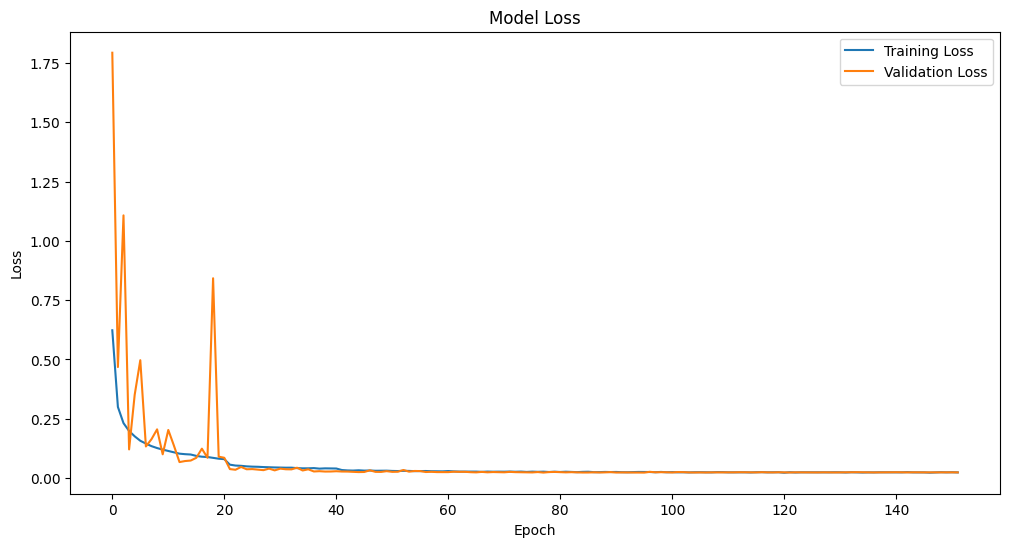

In [32]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Create a new figure for plotting with a specified size
plt.figure(figsize=(12, 6))

# Plot the training loss retrieved from the 'history' object returned by the model's fit method.
# 'loss' is a list containing the loss of the model at the end of each epoch during training.
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss in the same plot as the training loss for comparison.
# 'val_loss' is a list containing the loss of the model on the validation dataset at the end of each epoch.
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the title of the plot
plt.title('Model Loss')

# Set the label for the y-axis
plt.ylabel('Loss')

# Set the label for the x-axis
plt.xlabel('Epoch')

# Add a legend to the plot, positioned in the upper right corner, to help identify the plotted lines.
plt.legend(loc='upper right')

# Display the plot. This line renders the plot window and shows the graph with the plotted data.
plt.show()


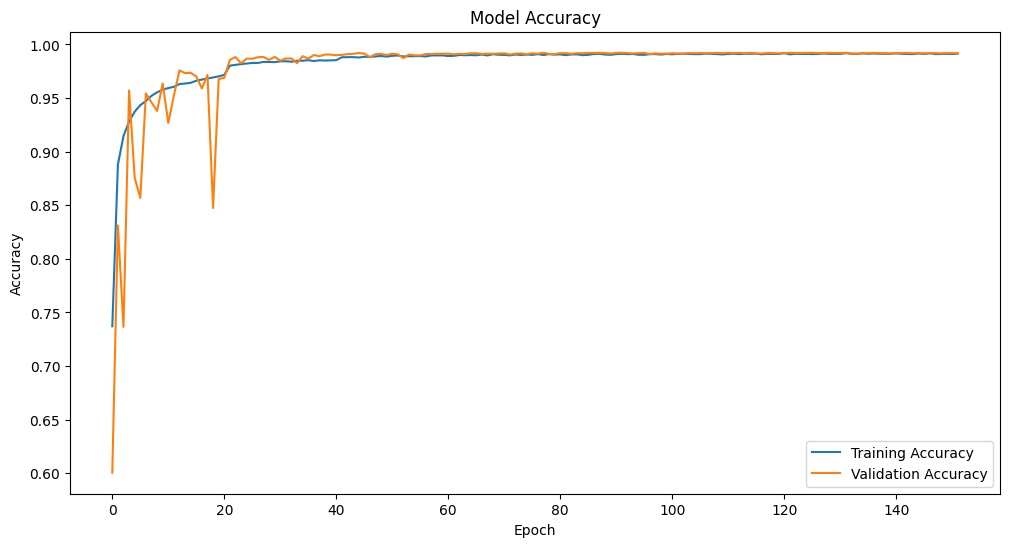

In [33]:
# Initialize a new figure with a specific size to accommodate the plot clearly.
plt.figure(figsize=(12, 6))

# Plot the training accuracy. The 'accuracy' key accesses the accuracy values from the history object,
# which is returned by the model's fit method. These values represent the accuracy metric recorded at the end
# of each epoch during the training phase.
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy on the same graph. The 'val_accuracy' key accesses the accuracy values on the
# validation dataset, allowing for a direct comparison of training and validation accuracy over epochs.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Set the title of the plot, which describes what the graph represents.
plt.title('Model Accuracy')

# Set the y-axis label to 'Accuracy' since the plot measures the accuracy percentage.
plt.ylabel('Accuracy')

# Set the x-axis label to 'Epoch' as the plot spans multiple training epochs.
plt.xlabel('Epoch')

# Place a legend on the plot, positioned in the 'lower right' to avoid obscuring the data.
# This legend helps differentiate between the plotted training and validation accuracy lines.
plt.legend(loc='lower right')

# Display the plot. This function call renders the plot window and shows the graph,
# making it visible with all the settings and data points plotted.
plt.show()



In [21]:
# Define the path to the CSV file that contains annotations for the test dataset
test_annotation_dir = './Final_Test_Labels_CSV/final_test_labels.csv'

# Define the path to the directory containing test images
test_image_dir = "./Final_Test_Dataset/Final_Test_Images"

# Load the CSV file using pandas' read_csv function.
# This function reads a comma-separated values (CSV) file into a DataFrame.
# The DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
data = pd.read_csv(test_annotation_dir)

# Display the first few rows of the DataFrame.
# The head() method returns the first 5 rows of the DataFrame by default.
print(data.head())


            image     label
0  liuStyle_丁.png  liuStyle
1  liuStyle_中.png  liuStyle
2  liuStyle_丸.png  liuStyle
3  liuStyle_丹.png  liuStyle
4  liuStyle_主.png  liuStyle


In [22]:
def load_test_data(test_image_dir, test_annotation_dir):
    """
    Load test data from a specified directory and annotations file.

    This function reads a CSV file containing image filenames and their labels,
    shuffles the data for randomness, loads each image, and appends it to a list along with its label.

    Parameters:
    test_image_dir (str): The directory where test images are stored.
    test_annotation_dir (str): The path to the CSV file containing image filenames and labels.

    Returns:
    tuple: A tuple of two lists, one containing the images and the other containing the labels.
    """
    images = []  # List to store the images
    labels = []  # List to store the corresponding labels
    print_limit = 5  # Limit the number of printed images to 10
    counter = 0  # Initialize counter for printed images
    
    # Load the annotations from the CSV file
    data = pd.read_csv(test_annotation_dir)
    
    # Shuffle the DataFrame rows to ensure random order of data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # Iterate through each row in the DataFrame to process each image and its label
    for index, row in data.iterrows():
        image_file = row['image']  # Ensure the column name 'image' matches in the CSV
        image_path = os.path.join(test_image_dir, image_file)  # Build the full image path

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"File does not exist: {image_path}")
            continue
        
        # Load the image in grayscale mode; change cv2.IMREAD_GRAYSCALE to another mode if needed
        img = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
        
        # Check if the image is loaded correctly
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue
        
        
        label = row['label']
        images.append(img)
        labels.append(label)
        
        # Print only the first 10 images and their labels
        if counter < print_limit:
            print(f"Appended image: {image_path}")
            print(f"Its label: {label}")
            counter += 1

    # After processing all images
    print("All images have been labeled.")
    
    return images, labels
    
# load test data
final_test_images, final_test_labels = load_test_data(test_image_dir, test_annotation_dir)


Appended image: ./Final_Test_Dataset/Final_Test_Images\clericalScript_奏.png
Its label: clericalScript
Appended image: ./Final_Test_Dataset/Final_Test_Images\ouyangStyle_輕.png
Its label: ouyangStyle
Appended image: ./Final_Test_Dataset/Final_Test_Images\clericalScript_缘.png
Its label: clericalScript
Appended image: ./Final_Test_Dataset/Final_Test_Images\clericalScript_吉.png
Its label: clericalScript
Appended image: ./Final_Test_Dataset/Final_Test_Images\yanStyle_斡.png
Its label: yanStyle
All images have been labeled.


In [23]:
# Define a function to preprocess test data
def preprocess_test_data(images, labels):
    """
    Preprocess test data by resizing images, normalizing, and ensuring correct dimensions for model input.

    Parameters:
    images (list): A list of image data, where each image is stored as a numpy array.
    labels (list): A list of labels corresponding to the images.

    Returns:
    tuple: A tuple containing two numpy arrays: processed_images and processed_labels.
    """
    processed_images = []  # List to store processed images
    processed_labels = []  # List to store corresponding labels
    
    # Loop over each image and corresponding label
    for image, label in zip(images, labels):
        # Resize the image to 96x96 pixels, which is the expected input size for the model
        new_test_image = cv2.resize(image, (96, 96))
        
        # Convert the resized image into a numpy array and normalize pixel values to [0, 1]
        test_image_array = np.array(new_test_image, dtype=np.float32) / 255.0
        
        # If the image is grayscale, ensure it has a channel dimension (96, 96, 1)
        if test_image_array.ndim == 2:
            test_image_array = test_image_array[..., np.newaxis]
        
        # Append the processed image and label to the lists
        processed_images.append(test_image_array)
        processed_labels.append(label)

    # Convert the lists of processed images and labels to numpy arrays for compatibility with machine learning libraries
    processed_images = np.array(processed_images)
    processed_labels = np.array(processed_labels)
    print("Preprocess is completed.")
    return processed_images, processed_labels

#  call the function
processed_test_images, processed_test_labels = preprocess_test_data(final_test_images, final_test_labels)


Preprocess is completed.


In [24]:
import numpy as np  # Import numpy for numerical operations and handling arrays
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for label encoding

# Ensure that the list of processed test images is converted into a 4D numpy array.
# This conversion is necessary because machine learning models, especially those built using frameworks like TensorFlow,
# expect input data in a batch-like format (i.e., an array with dimensions corresponding to [batch_size, height, width, channels]).
# # Here, we assume images are grayscale, so the channel dimension will be 1.
final_test_images_4D = np.array(processed_test_images)
print("Shape of final_test_images_4D:", final_test_images_4D.shape)
# Initialize the LabelEncoder, which will be used to convert string labels into integers.
le = LabelEncoder()

# Fit the LabelEncoder on the test labels and transform them into an array of integers.
# This step is crucial for classification tasks where the labels must be numeric.
encoded_test_labels = le.fit_transform(processed_test_labels)

# Print the first 30 encoded labels to verify that the encoding is correct.
# This also helps in checking that the transformation has been applied uniformly.
print("First 30 encoded labels:", encoded_test_labels[:30])


Shape of final_test_images_4D: (782, 96, 96, 1)
First 30 encoded labels: [0 2 0 0 3 1 3 0 2 0 0 2 0 1 3 3 3 0 2 1 3 0 1 3 1 1 3 0 0 1]


In [25]:
import matplotlib.pyplot as plt

def plot_misclassified_images(images, true_labels, predicted_labels, encoder, images_per_row=10):
    """
    Function to plot the misclassified images using LabelEncoder to retrieve original labels,
    organized in rows according to the specified number of images per row.
    
    Parameters:
    images (numpy.ndarray): The array of images.
    true_labels (numpy.ndarray): True labels of the images.
    predicted_labels (numpy.ndarray): Model's predicted labels for the images.
    encoder (LabelEncoder): An instance of LabelEncoder that was used to encode the labels.
    images_per_row (int): Number of images to display per row.
    """
    # Identify misclassified images
    misclassified_indices = np.where(predicted_labels != true_labels)[0]
    
    # Limit the number of misclassified images to display
    max_display = 100 
    num_display = min(len(misclassified_indices), max_display)
    
    # Calculate number of rows needed
    num_rows = (num_display + images_per_row - 1) // images_per_row
    
    plt.figure(figsize=(24, 3 * num_rows))
    
    for i, index in enumerate(misclassified_indices[:num_display]):
        plt.subplot(num_rows, images_per_row, i + 1)  # Adjust subplot parameters based on rows and columns
        image = images[index].reshape(96, 96)  # Adjust this if using color images
        plt.imshow(image, cmap='gray')
        original_label = encoder.inverse_transform([true_labels[index]])[0]
        predicted_label = encoder.inverse_transform([predicted_labels[index]])[0]
        plt.title(f"True: {original_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

25/25 [==============================] - 8s 99ms/step
Test Loss: 0.2530, Test Accuracy: 0.9246
Precision: 0.9325361525325431
Recall: 0.9239822891884748
F1 Score: 0.9203417918381405


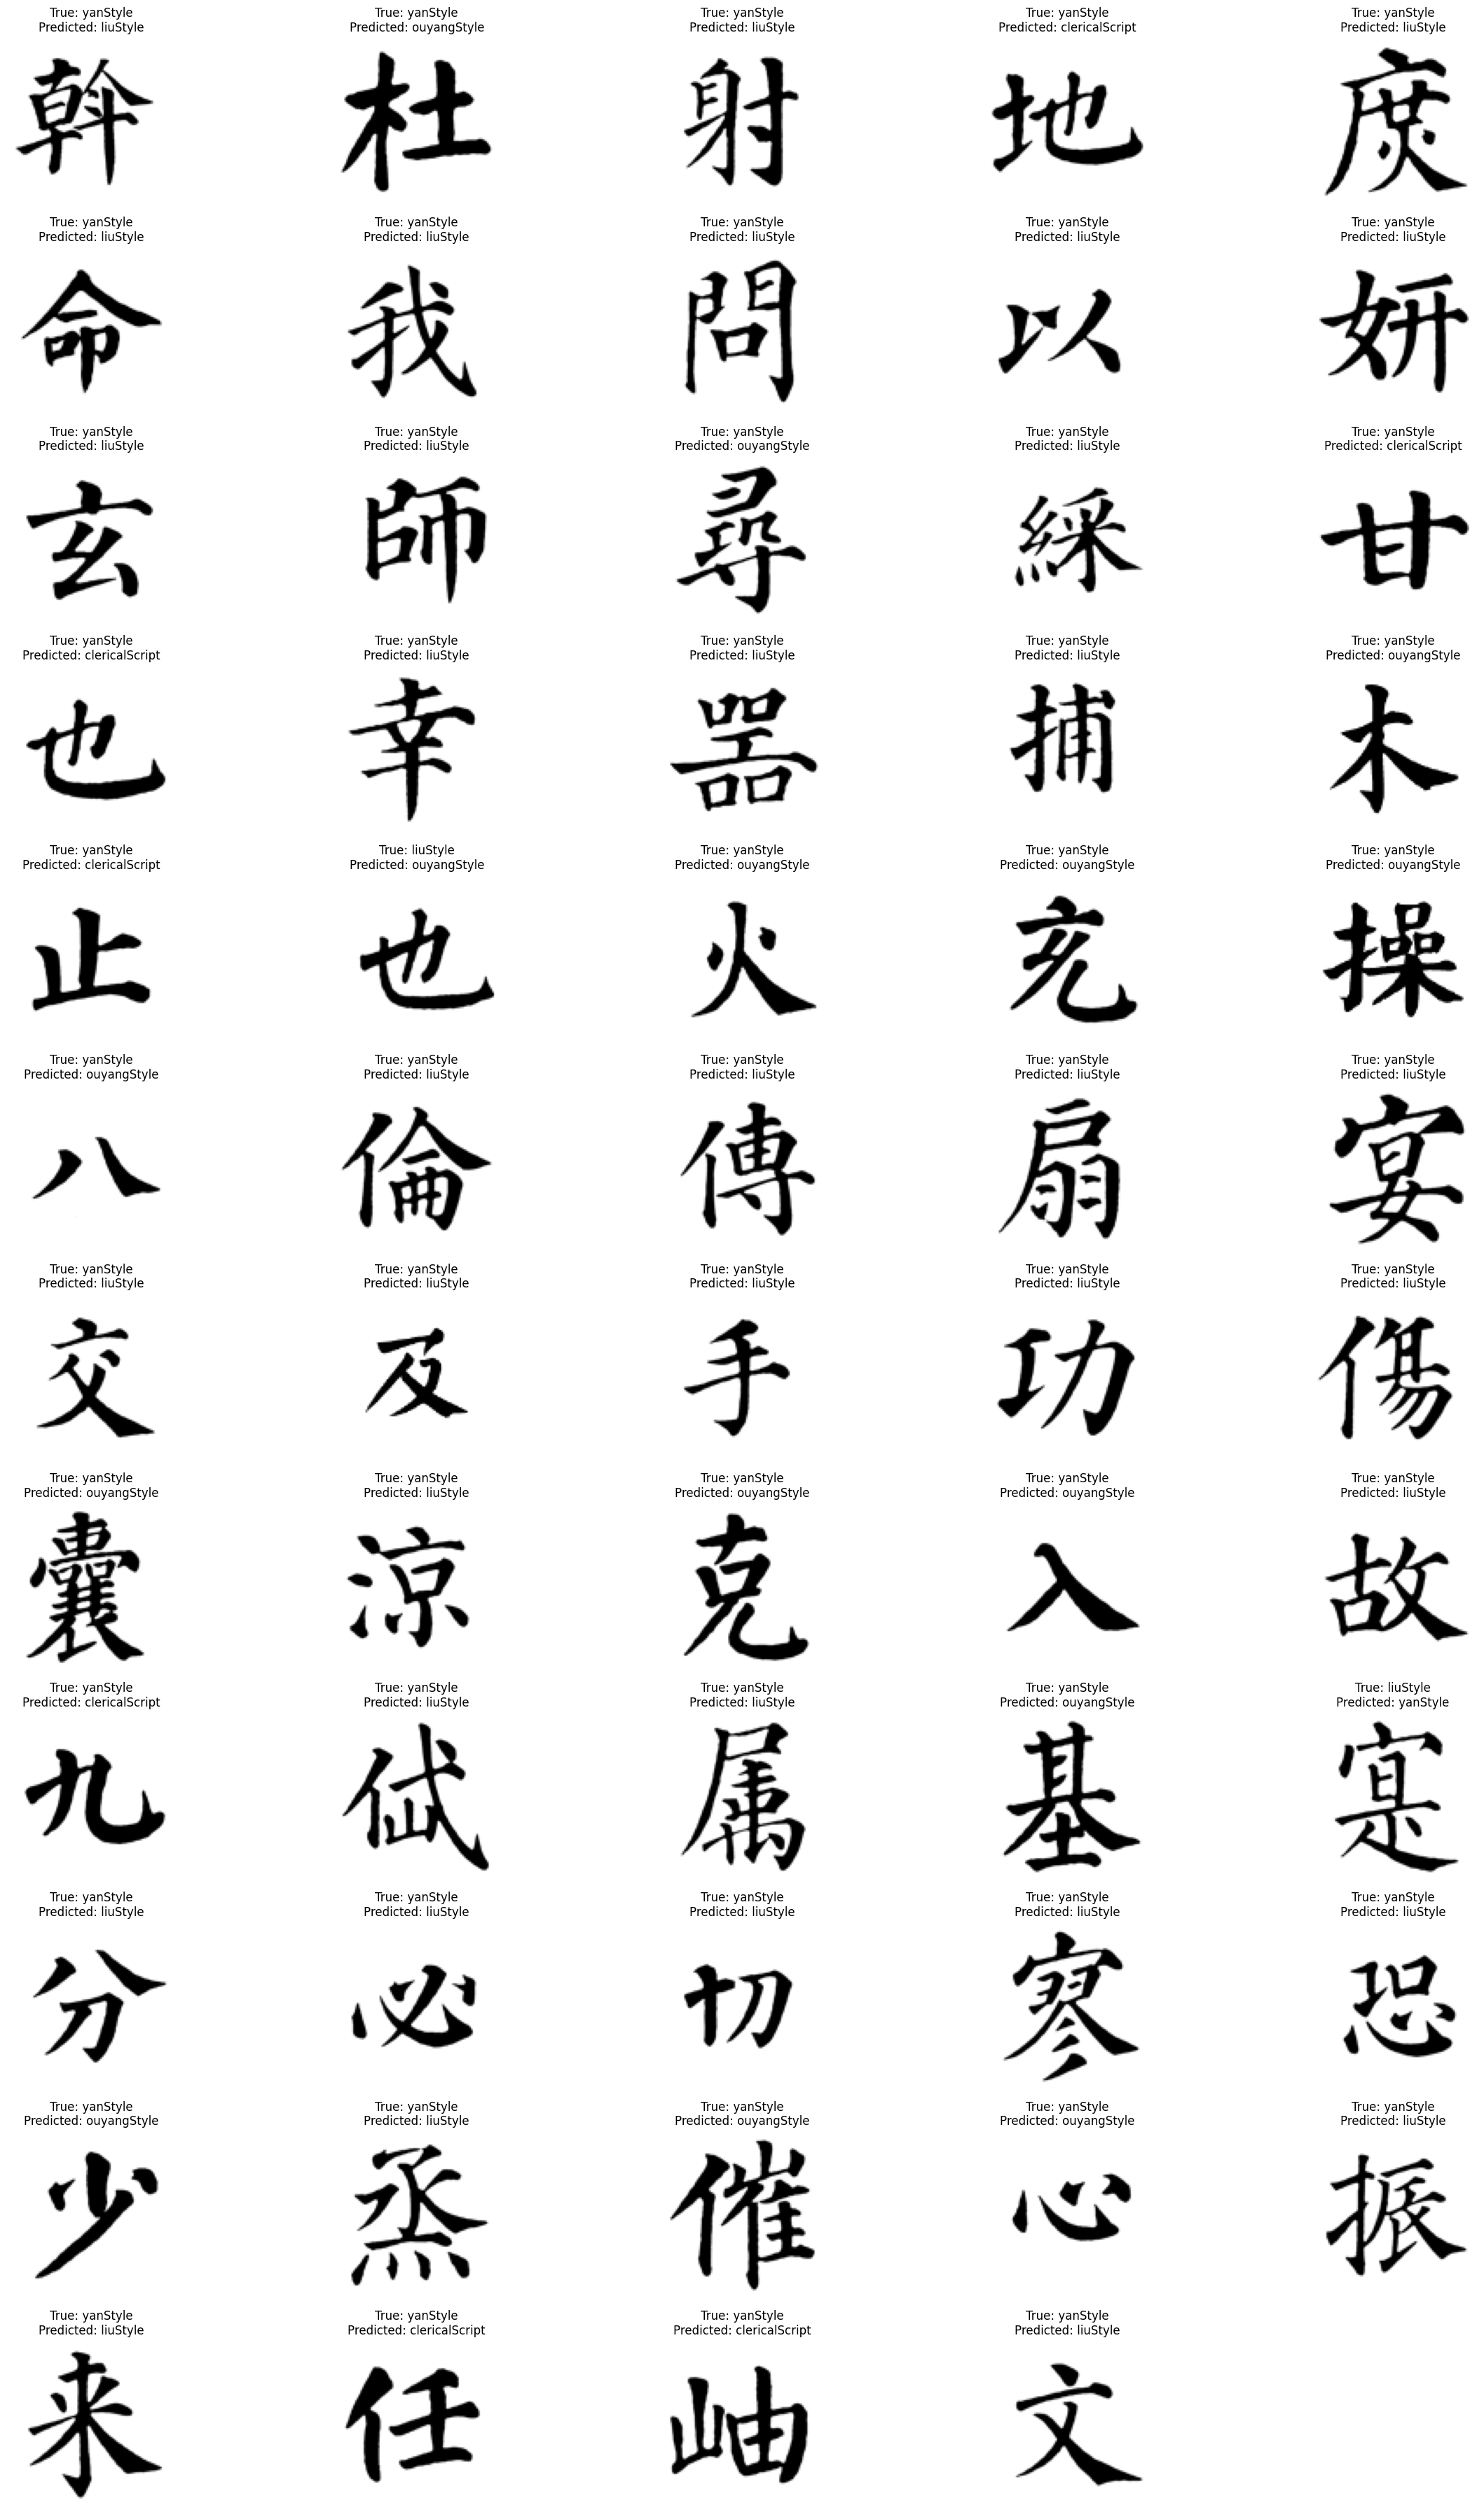

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Load the previously trained and saved model
independent_test_model = load_model('best_model.keras')

# Use the model to predict the classes of the test images
test_predictions = independent_test_model.predict(processed_test_images)
predicted_classes = np.argmax(test_predictions, axis=1)  # Get the class with the highest probability for each image

# True classes for the test images
true_classes = encoded_test_labels

# Evaluate the model on the test images and true classes
results = independent_test_model.evaluate(processed_test_images, true_classes, verbose=0)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

# Generate a detailed classification report
report = classification_report(true_classes, predicted_classes, output_dict=True)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1 Score:", report['macro avg']['f1-score'])

# Call the function to plot misclassified images with a defined number of images per row
plot_misclassified_images(processed_test_images, true_classes, predicted_classes, le, images_per_row=5)



In [ ]:
# Independent test 
# test the model on an independent set of font images from the same variant of the calligraphy styles used in training, 
# but not the exact same images.

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Load the previously trained and saved model
independent_test_model = load_model('best_model.keras')

# Use the model to predict the classes of the test images
test_predictions = independent_test_model.predict(processed_test_images)
predicted_classes = np.argmax(test_predictions, axis=1)  # Get the class with the highest probability for each image

# True classes for the test images
true_classes = encoded_test_labels

# Evaluate the model on the test images and true classes
results = independent_test_model.evaluate(processed_test_images, true_classes, verbose=0)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

# Generate a detailed classification report
report = classification_report(true_classes, predicted_classes, output_dict=True)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1 Score:", report['macro avg']['f1-score'])


# Perform 5-fold cross-validation to assess model stability
kf = KFold(n_splits=5)
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

# Split data into training and validation subsets for each fold
for train_index, test_index in kf.split(final_test_images_4D):
    x_train, x_val = final_test_images_4D[train_index], final_test_images_4D[test_index]
    y_train, y_val = encoded_test_labels[train_index], encoded_test_labels[test_index]
    
    # Train the model on each fold
    model.fit(x_train, y_train, epochs=10, verbose=0)
    val_predictions = model.predict(x_val)
    val_pred_classes = np.argmax(val_predictions, axis=1)
    val_report = classification_report(y_val, val_pred_classes, output_dict=True)
    val_results = model.evaluate(x_val, y_val, verbose=0)
    
    # Collect performance metrics for each fold
    cv_accuracy.append(val_results[1])
    cv_precision.append(val_report['macro avg']['precision'])
    cv_recall.append(val_report['macro avg']['recall'])
    cv_f1.append(val_report['macro avg']['f1-score'])

# Print the average performance metrics across all folds
print(f"Cross-validation Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Cross-validation Precision: {np.mean(cv_precision):.4f}")
print(f"Cross-validation Recall: {np.mean(cv_recall):.4f}")
print(f"Cross-validation F1 Score: {np.mean(cv_f1):.4f}")

# Compute ROC curve and AUC for a specific class (assuming class '1' is the positive class)
fpr, tpr, thresholds = roc_curve(true_classes, test_predictions[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


25/25 [==============================] - 3s 111ms/step
Test Loss: 0.2530, Test Accuracy: 0.9246
Precision: 0.9325361525325431
Recall: 0.9239822891884748
F1 Score: 0.9203417918381405
5/5 [==============================] - 1s 160ms/step


In [29]:
# Define the path to the CSV file that contains annotations for the test dataset
extra_test_annotation_dir = './Extra_Final_Test_Labels_CSV/extra_final_test_labels.csv'

# Define the path to the directory containing test images
extra_test_image_dir = "./Extra_Final_Test_Dataset/Final_Test_Images"

# Load the CSV file using pandas' read_csv function.
# This function reads a comma-separated values (CSV) file into a DataFrame.
# The DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

data = pd.read_csv(extra_test_annotation_dir)

# Display the first few rows of the DataFrame.
# The head() method returns the first 5 rows of the DataFrame by default.

print(data.head())

                  image     label
0  liuStyle_LiuC501.png  liuStyle
1  liuStyle_LiuC502.png  liuStyle
2  liuStyle_LiuC503.png  liuStyle
3  liuStyle_LiuC504.png  liuStyle
4  liuStyle_LiuC505.png  liuStyle


In [30]:
# load extra test 1 data
extra_final_test_images, extra_final_test_labels = load_test_data(extra_test_image_dir, extra_test_annotation_dir)

Appended image: ./Extra_Final_Test_Dataset/Final_Test_Images\ouyangStyle_OuC516.png
Its label: ouyangStyle
Appended image: ./Extra_Final_Test_Dataset/Final_Test_Images\liuStyle_LiuC535.png
Its label: liuStyle
Appended image: ./Extra_Final_Test_Dataset/Final_Test_Images\yanStyle_YanC530.png
Its label: yanStyle
Appended image: ./Extra_Final_Test_Dataset/Final_Test_Images\ouyangStyle_OuC540.png
Its label: ouyangStyle
Appended image: ./Extra_Final_Test_Dataset/Final_Test_Images\clericalScript_CleB555.png
Its label: clericalScript
All images have been labeled.


In [31]:
# preprocess extra test 1 data
extra_processed_test_images, extra_processed_test_labels = preprocess_test_data(extra_final_test_images, extra_final_test_labels)

Preprocess is completed.


In [32]:
import numpy as np  # Import numpy for numerical extra_processed_test_images, extra_processed_test_labels = preprocess_test_data(extra_final_test_images, extra_final_test_labels)operations and handling arrays
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for label encoding

# Ensure that the list of processed test images is converted into a 4D numpy array.
# This conversion is necessary because machine learning models, especially those built using frameworks like TensorFlow,
# expect input data in a batch-like format (i.e., an array with dimensions corresponding to [batch_size, height, width, channels]).
# # Here, we assume images are grayscale, so the channel dimension will be 1.
extra_final_test_images_4D = np.array(extra_processed_test_images)
print("Shape of extra_final_test_images_4D:", extra_final_test_images_4D.shape)
# Initialize the LabelEncoder, which will be used to convert string labels into integers.
le = LabelEncoder()

# Fit the LabelEncoder on the test labels and transform them into an array of integers.
# This step is crucial for classification tasks where the labels must be numeric.
extra_encoded_test_labels = le.fit_transform(extra_processed_test_labels)

# Print the first 30 encoded labels to verify that the encoding is correct.
# This also helps in checking that the transformation has been applied uniformly.
print("First 30 encoded labels:", extra_encoded_test_labels[:30])


Shape of extra_final_test_images_4D: (400, 96, 96, 1)
First 30 encoded labels: [2 1 3 2 0 2 3 3 3 3 1 1 0 2 0 0 1 1 3 3 2 3 0 1 1 1 1 1 2 1]


In [33]:
import joblib
joblib.dump(le, 'label_encoder.joblib')  # save LabelEncoder

['label_encoder.joblib']

13/13 [==============================] - 2s 124ms/step
Test Loss: 4.5141, Test Accuracy: 0.4775
Precision: 0.34652509652509655
Recall: 0.47750000000000004
F1 Score: 0.37749566130467116


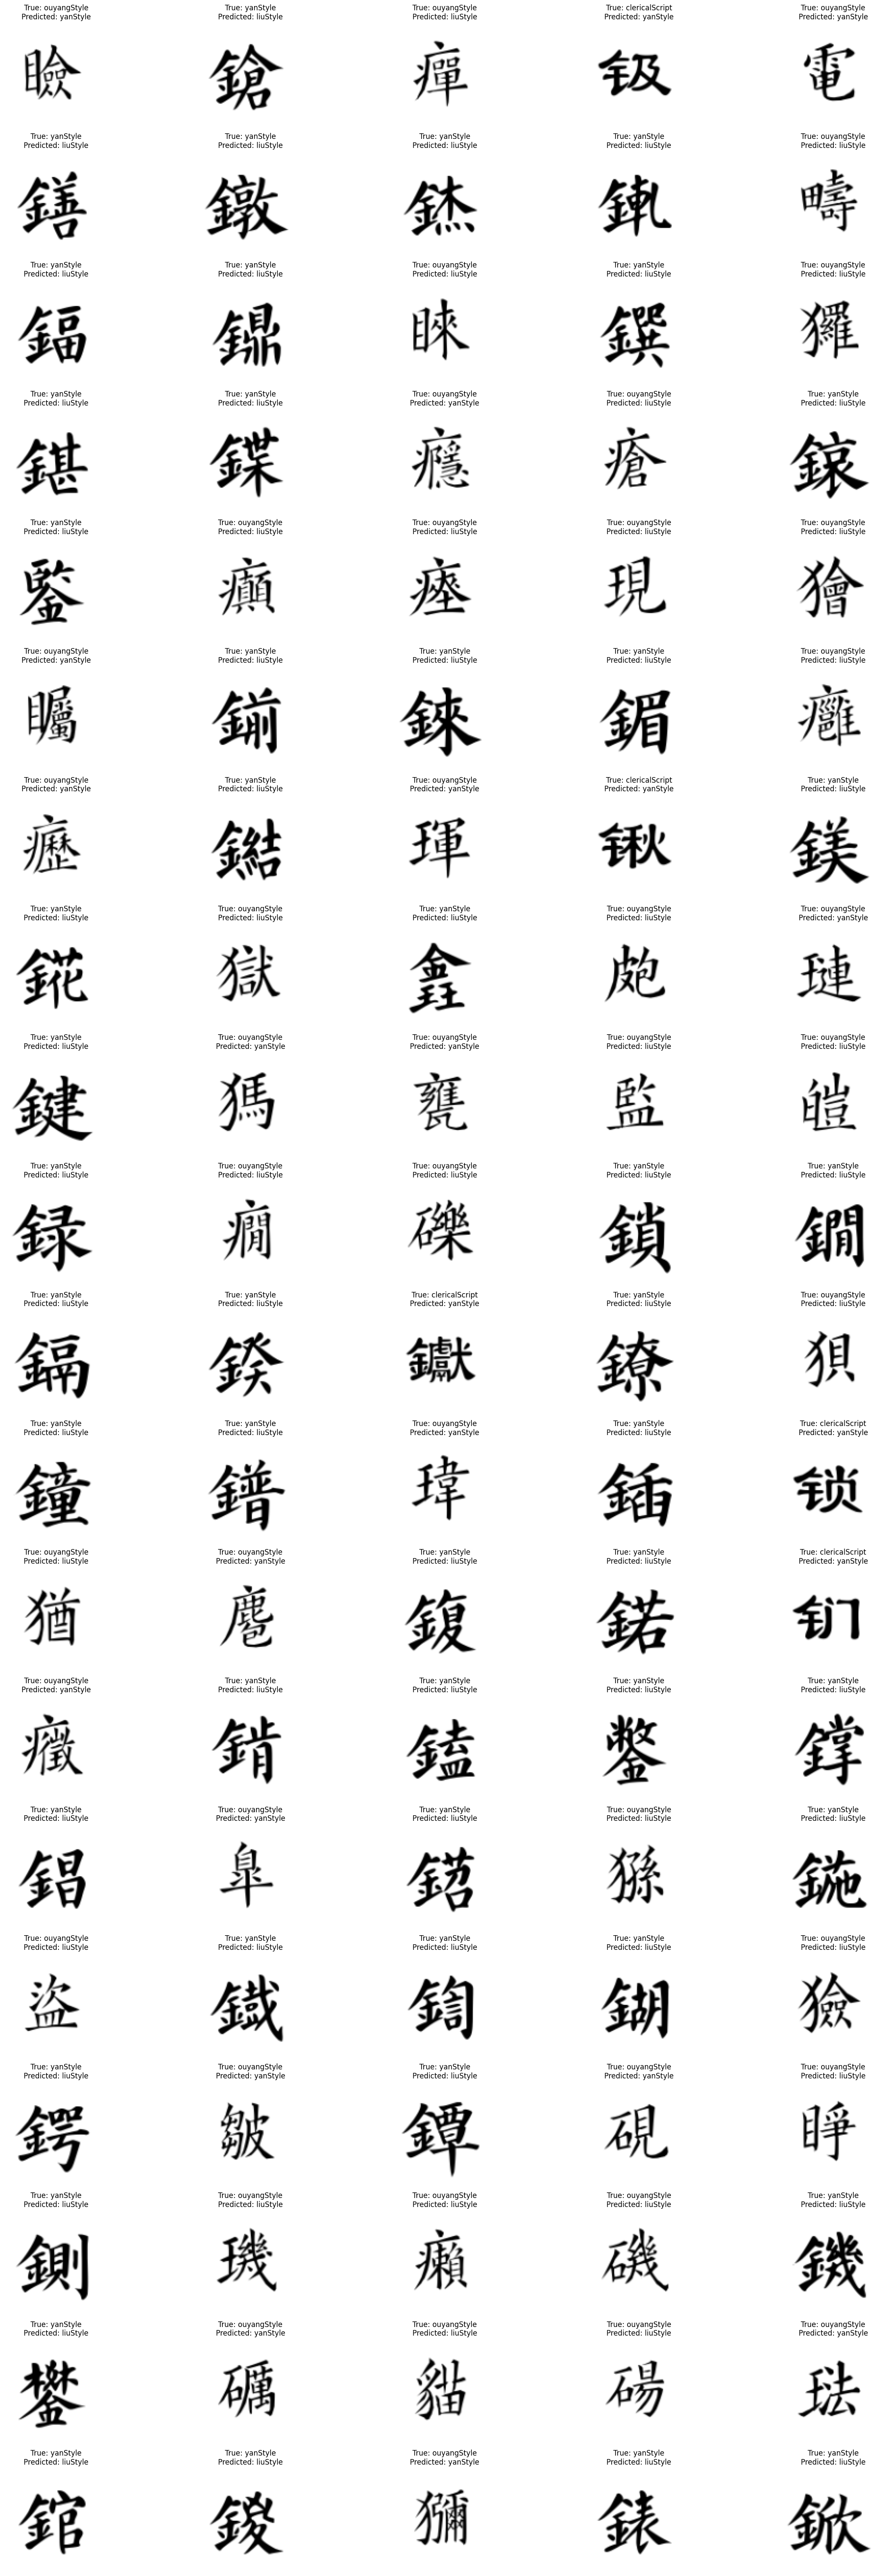

In [34]:
# Extra test 1
# test the model on unseen variations of the four calligraphy styles from different variants than those used in training, 
# extracted from TTF files.
extra_test_model = load_model('best_model.keras') #load model
le = joblib.load('label_encoder.joblib')  # load LabelEncoder

# Use the model to predict the classes of the test images
extra_test_predictions = extra_test_model.predict(extra_processed_test_images)
extra_predicted_classes = np.argmax(extra_test_predictions, axis=1)  # Get the class with the highest probability for each image

# True classes for the test images
extra_true_classes = extra_encoded_test_labels



# Evaluate the model on the test images and true classes
extra_results = extra_test_model.evaluate(extra_processed_test_images, extra_true_classes, verbose=0)
print(f"Test Loss: {extra_results[0]:.4f}, Test Accuracy: {extra_results[1]:.4f}")
# Generate a detailed classification report

extra_report = classification_report(extra_true_classes, extra_predicted_classes, output_dict=True)
print("Precision:", extra_report['macro avg']['precision'])
print("Recall:", extra_report['macro avg']['recall'])
print("F1 Score:", extra_report['macro avg']['f1-score'])

# Call the function to plot misclassified images with a defined number of images per row
plot_misclassified_images(extra_processed_test_images, extra_true_classes, extra_predicted_classes, le, images_per_row=5)


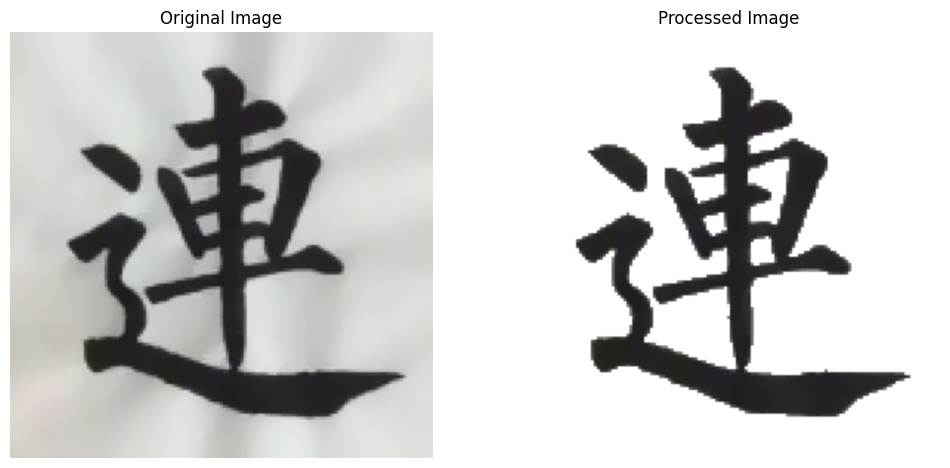

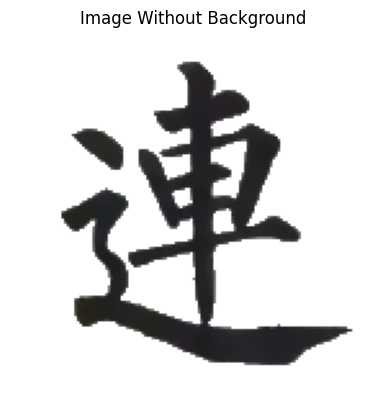

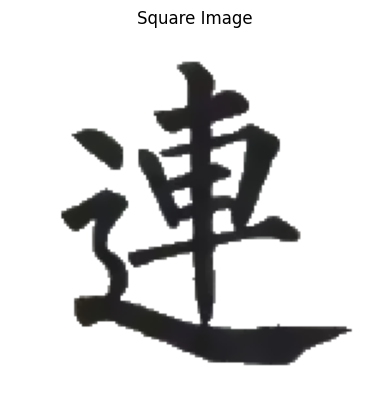

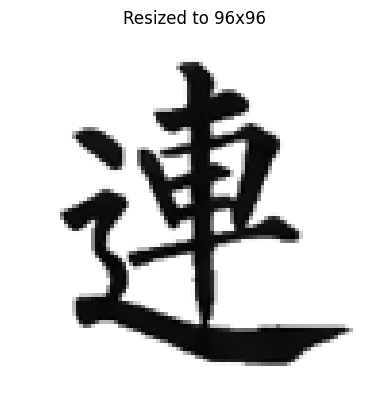

1/1 [==============================] - 1s 674ms/step
Predicted class: 1
The predicted label is: liuStyle


In [35]:
# Extra test 2, test on an unseen screen-shot of a single handwritten character 

from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib

def read_image_from_path(image_path):
    try:
        with open(image_path, 'rb') as file:
            image_data = file.read()
            image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

def make_square(image):
    """ Ensure the image is square by padding shorter sides without distorting the image aspect ratio. """
    height, width = image.shape[:2]
    size = max(height, width)
    # Create a new white square layer as the background
    layer = np.full((size, size, 3), 255, dtype=np.uint8)
    # Compute centering position
    x_offset = (size - width) // 2
    y_offset = (size - height) // 2
    # Place the original image in the center of the square layer
    layer[y_offset:y_offset+height, x_offset:x_offset+width] = image
    return layer


def remove_background(image):
    try:
        # Convert to grayscale image
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Otsu's thresholding
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Invert the mask to make the text white and the background black
        mask = cv2.bitwise_not(mask)
        
        # Create an all-white background
        background = np.full(image.shape, 255, dtype=np.uint8)
        
        # Combine the foreground with the background using the mask
        foreground = cv2.bitwise_and(image, image, mask=mask)
        white_background = cv2.bitwise_and(background, background, mask=cv2.bitwise_not(mask))
        result = cv2.add(foreground, white_background)
        
        return result
    except Exception as e:
        print(f"Error removing background: {e}")
        return None

def prepare_image(image_path):
    image = read_image_from_path(image_path)
    if image is None:
        return None
    image = remove_background(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image Without Background')
    plt.axis('off')
    plt.show()
    
    # Check if the image is not square and make it square
    if image.shape[0] != image.shape[1]:
        image = make_square(image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Square Image')
        plt.axis('off')
        plt.show()
        
    # Convert image to grayscale and resize
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_pil = image_pil.convert('L')
    image_pil = image_pil.resize((96, 96))
    plt.imshow(image_pil, cmap='gray')
    plt.title('Resized to 96x96')
    plt.axis('off')
    plt.show()

    # Prepare image array for model prediction
    image_array = np.array(image_pil)
    image_array = image_array.astype('float32') / 255.0
    image_array = image_array[..., np.newaxis]
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

def display_and_predict(image_path, model, le):
    original_image = read_image_from_path(image_path)
    if original_image is None:
        return
    processed_image = remove_background(original_image.copy())
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()
    
    image_array = prepare_image(image_path)
    if image_array is not None:
        predictions = model.predict(image_array)
        predicted_classes = np.argmax(predictions, axis=1)
        print("Predicted class:", predicted_classes[0])
        original_label = le.inverse_transform([predicted_classes[0]])
        print("The predicted label is:", original_label[0])
    else:
        print("Image preparation failed.")

# Initialize and load
model = load_model('best_model.keras')
le = joblib.load('label_encoder.joblib')  # Load LabelEncoder

# Call the function
image_path = "./extra_test_screenshots/liuStyle_2024-08-07_01-15-02.png"
display_and_predict(image_path, model, le)


In [36]:
# Extra test 2, test on a folder of unseen screen-shots of handwritten characters
# various original image shapes
# various background colours

import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

def read_image_from_path(image_path):
    try:
        with open(image_path, 'rb') as file:
            image_data = file.read()
            image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

def make_square(image):
    """ Ensure the image is square by padding shorter sides without distorting the image aspect ratio. """
    height, width = image.shape[:2]
    size = max(height, width)
    # Create a new white square layer as the background
    layer = np.full((size, size, 3), 255, dtype=np.uint8)
    # Compute centering position
    x_offset = (size - width) // 2
    y_offset = (size - height) // 2
    # Place the original image in the center of the square layer
    layer[y_offset:y_offset+height, x_offset:x_offset+width] = image
    return layer

def remove_background(image):
    try:
        # Convert to grayscale image
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Otsu's thresholding
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Invert the mask to make the text white and the background black
        mask = cv2.bitwise_not(mask)
        
        # Create an all-white background
        background = np.full(image.shape, 255, dtype=np.uint8)
        
        # Combine the foreground with the background using the mask
        foreground = cv2.bitwise_and(image, image, mask=mask)
        white_background = cv2.bitwise_and(background, background, mask=cv2.bitwise_not(mask))
        result = cv2.add(foreground, white_background)
        
        return result
    except Exception as e:
        print(f"Error removing background: {e}")
        return None


def prepare_image(image_path):
    image = read_image_from_path(image_path)
    if image is None:
        return None
    image = remove_background(image)
    
    # Check if the image is not square and make it square
    if image.shape[0] != image.shape[1]:
        image = make_square(image)
        
    # Convert image to grayscale and resize
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_pil = image_pil.convert('L')
    image_pil = image_pil.resize((96, 96))

    # Prepare image array for model prediction
    image_array = np.array(image_pil)
    image_array = image_array.astype('float32') / 255.0
    image_array = image_array[..., np.newaxis]
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

def evaluate_folder(folder_path, model, le):
    true_labels = []
    predicted_labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            label = filename.split('_')[0]
            true_labels.append(label)
            
            image_path = os.path.join(folder_path, filename)
            image_array = prepare_image(image_path)
            
            if image_array is not None:
                predictions = model.predict(image_array, verbose=0)
                predicted_class = np.argmax(predictions, axis=1)
                predicted_label = le.inverse_transform([predicted_class[0]])[0]
                predicted_labels.append(predicted_label)
            else:
                print(f"Image preparation failed for {filename}")
    
    # Encode labels for comparison
    true_labels_encoded = le.transform(true_labels)
    predicted_labels_encoded = le.transform(predicted_labels)
    
    # Calculate classification metrics
    report = classification_report(true_labels_encoded, predicted_labels_encoded, output_dict=True)
    
    # Extract overall metrics
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Print only overall metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    return accuracy, precision, recall, f1_score

# Initialize and load the model
model = load_model('best_model.keras')
le = joblib.load('label_encoder.joblib')  # Load LabelEncoder

# Call the function
folder_path = './extra_test_screenshots'
evaluate_folder(folder_path, model, le)

Accuracy: 0.5865
Precision: 0.5843
Recall: 0.6095
F1 Score: 0.5786


(0.5864661654135338,
 0.5842936406316689,
 0.6094671632715111,
 0.5786128364389234)